In [2]:
# ConvNets - used to observe patterns in an image
# first few layers - lines/boundaries etc.
# next layers (later) - more complex patterns
import keras
from keras.models import Sequential

/home/kushashwa/.local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [55]:
from keras.layers import Conv2D
from keras.layers import Activation, MaxPooling2D

(183, 275, 3)
Resizing...
(400, 320, 3)


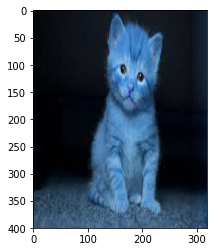

In [64]:
def nice_cat_printer(model, cat):
    cat_batch = np.expand_dims(cat, axis = 0)
    conv_cat2 = model.predict(cat_batch)
    
    conv_cat2 = np.squeeze(conv_cat2, axis = 0)
    print(conv_cat2.shape)
    
#     conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])
    
    print(conv_cat2.shape)
    plt.imshow(conv_cat2)

(183, 275, 3)
Resizing...
(400, 320, 3)
(98, 78, 3)
(98, 78, 3)


/home/kushashwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(400, 320,...)`
  # This is added back by InteractiveShellApp.init_path()
/home/kushashwa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(400, 320,...)`
  


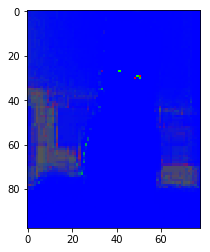

In [66]:
# preprocessing the image
cat = cv2.imread("/home/kushashwa/Pictures/Cat.jpg") # read image of the cat
print(cat.shape)
# resize to (320, 400, 3)
print("Resizing...")
cat = cv2.resize(cat, (320, 400))
print(cat.shape)
plt.imshow(cat)

# LeNet Architecture
model = Sequential()
model.add(Conv2D(3, 3, 3, input_shape = cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(3, 3, 3, input_shape = cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Activation('softmax'))

# UNet Architecture

# cat_batch = np.expand_dims(cat, axis = 0)
# conv_cat = model.predict(cat_batch)
# visualize_cat(conv_cat)
nice_cat_printer(model, cat)